**Homeworks – Graph Theory and Algorithms, 2021/22. semester I.**

Week 6

- name: Nagy, Balázs
- neptun: hpq7oi
- e-mail: [balazs_nagy@outlook.com](balazs_nagy@outlook.com)

In [1]:
# set the seed so we can reproduce the pseudo-random results
set_random_seed(314159265)

- Hamiltonian-path: a path containing all vertices
- Hamiltonian-circle: a circle containing all vertices

Every tournament (complete directed graph) contains a Hamiltonian-path.

# Hamiltonian path

![img/w6ex1.png](img/w6ex1.png)

Below is my implementation using the algorithm discussed during the lecture.

The function `HamiltonianPathOfTournament` has the following arguments:
- `T` is expected to be a tournament (complete directed graph) - this input is validated
- `algorithm`:
    - if `algorithm='minimal_in_degree'`: the starting vertex is a vertex with minimal degree (if there are multiple vertices with the same minimum, the one with the smallest label is used)
    - if `algorithm='random'`: randomly select a vertex
    - if not specified: start with the first vertex (smallest label)
- `print_on`: if set to `True` the steps of the algorithm is printed
- `plot`: if set set to `True` the Hamiltonian path is plotted.

In [2]:
import numpy as np

def HamiltonianPathOfTournament(T, algorithm='not specified', print_on=False, plot=False):
    # assert whether T input is a tournament
    assert T.is_tournament()
    
    # list of vertices in T
    vertices = T.vertices()
    
    if algorithm == 'minimal_in_degree':
        # start the algorithm in the vertex v with the smallest in-degree
        v0 = np.argmin(T.in_degree())
    elif algorithm == 'random':
        # start the algorithm in a random vertex
        v0 = np.random.choice(vertices)
    else:
        # if not specified
        v0 = vertices[0]
    vertices.remove(v0)
    
    # list for storing the vertices of the Hamiltonian path (in order)
    path = [v0]
    if print_on: print(f'Algorithm={algorithm} v0={v0}, path={path}')
    
    while vertices:
        # choose a free vertex
        v = vertices.pop(0)
        if print_on: print(f'  v={v}, path={path}')
        
        for u in path:    
            has_edge = T.has_edge(v, u)
            if has_edge:
                # if v has directed edge with u
                # we have found a shorter path
                path.insert(path.index(u), v)
                if print_on: print(f'    ({v},{u}) is a directed edge, insert v={v} before u={u} -  path:{path}')
                break
            elif u == path[-1]:
                # v is a sink of the vertices in the current path
                path.append(v)
                if print_on: print(f'    v={v} is a sink of existing vertices, append to the end -  path:{path}')
                break
            else:
                # v has no directed edge with u
                # which means that u has directed edge with v
                pass
    if plot:
        edges_of_hamiltonian_path = [(path[i], path[i+1], None) for i in range(len(path)-1)]
        g = T.copy()
        for e in g.edges():
            if e not in edges_of_hamiltonian_path:
                g.delete_edge(e)
        g.show()
    return path

Random tournament on 7-vertices:


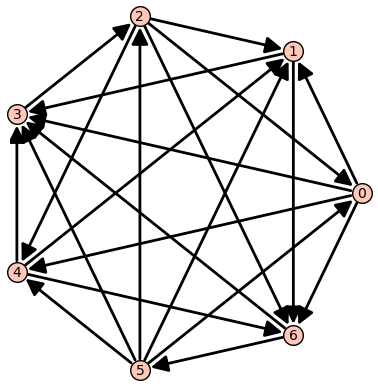

Hamiltonian path of tournament on 7-vertices:


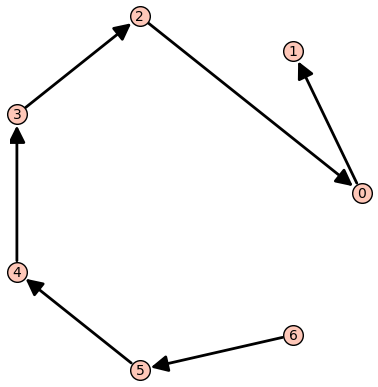

[6, 5, 4, 3, 2, 0, 1]

In [3]:
# number of edges
n = 7
print(f'Random tournament on {n}-vertices:')
g = digraphs.RandomTournament(n)
g.show()

print(f'Hamiltonian path of tournament on {n}-vertices:')
HamiltonianPathOfTournament(g, algorithm='random', print_on=False, plot=True)

There is also a function which returns one specific Hamiltonian path.

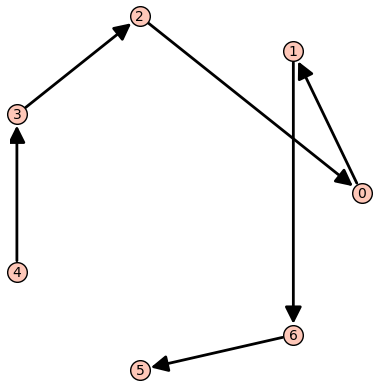

In [4]:
g.hamiltonian_path().show()

## Hamiltonian cycle (or directed cut)  

![img/w6ex2.png](img/w6ex2.png)

In [5]:
def HamiltonianCycleOfTournament(T, plot=True):
    #################################################################
    # 1) Graph is acyclic -> contains a sink -> return directed cut
    #################################################################
    if max(T.in_degree()) == n-1:
        sink = np.argmax(T.in_degree())
        S = set([sink])
        V = set(T.vertices())
        print('Graph is acyclic, returning directed cut (S:sink, V-S:every other vertex).')
        return S, V - S
    
    #################################################################
    # 2) Graph is not acyclic -> either H-circle or directed cut exists
    #################################################################
    # find Hamiltonian path (every tournament contains a H-path)
    path = HamiltonianPathOfTournament(T, algorithm='random', print_on=False, plot=False)
    print('Hamiltonian path:', path)

    # find largest cycle in Hamiltonian path
    for v in path[::-1]:
        for u in path:
            if T.has_edge(v, u):
                #print((v, u))
                break
        else:
            # only executed if the inner loop did NOT break
            continue
        # only executed if the inner loop DID break
        break
    cycle = path[path.index(u):path.index(v)+1]
    other_vertices = list(set(T.vertices()) - set(cycle))
    print('Largest cycle in H-path:', cycle)
    print('Unused vertices:', other_vertices)

    vertices_with_only_out_edges_to_the_circle = []
    vertices_with_only_in_edges_from_the_circle = []

    for v in other_vertices:
        # edges pointing to the cycle
        out_neighbors = list(set(cycle).intersection(set(T.neighbors_out(v))))
        # edges pointing from the cycle
        in_neighbors = list(set(cycle).intersection(set(T.neighbors_in(v))))

        if len(out_neighbors) == 0:
            # if v has only in edges from the circle
            vertices_with_only_in_edges_from_the_circle.append(v)
            continue
        if len(in_neighbors) == 0:
            # check if v has only out edges to the circle
            vertices_with_only_out_edges_to_the_circle.append(v)
            continue
        # increase the current cycle to the maximum possible size
        for i, c in enumerate(cycle[::-1]):
            c_prev = cycle[-(i+2)]
            if (c in out_neighbors) and (c_prev in in_neighbors):
                cycle.insert(-(i+1), v)
                break
    
    #################################################################
    # 2a) if either of the set of unused in and out vertices are empty -> directed cut 
    #################################################################
    if (len(vertices_with_only_in_edges_from_the_circle) == 0) and (len(vertices_with_only_out_edges_to_the_circle) !=0):
        S = set(vertices_with_only_out_edges_to_the_circle)
        V = set(T.vertices())
        print('Returning directed cut (S:directed cut (vertices with only out edges from the circle), V-S:every other vertex).')
        return S, V - S
    elif (len(vertices_with_only_in_edges_from_the_circle) != 0) and (len(vertices_with_only_out_edges_to_the_circle) ==0):
        S = set(vertices_with_only_in_edges_from_the_circle)
        V = set(T.vertices())
        print('Returning directed cut (S:directed cut (vertices with only in edges to the circle), V-S:every other vertex).')
        return S, V - S
    #################################################################
    # 2b) if there are no unused vertices left -> cycle is maximal size -> H-cycle
    #################################################################
    elif len(set(T.vertices()) - set(cycle)) == 0:
        if plot:
            edges_of_hamiltonian_cycle = [(cycle[i], cycle[i+1], None) for i in range(len(cycle)-1)]
            edges_of_hamiltonian_cycle.append((cycle[-1], cycle[0], None))
            edges_of_hamiltonian_cycle
            g = T.copy()
            for e in g.edges():
                if e not in edges_of_hamiltonian_cycle:
                    g.delete_edge(e)
            g.show()
        print('Hamiltonian cycle:')
        return cycle
    #################################################################
    # 2c) if both the set of unused in and out vertices are non-empty
    #     then we may find a H-path, otherwise a directed cut
    #################################################################
    else:
        return 'not implemented'

Hamiltonian path: [17, 19, 18, 16, 9, 10, 15, 12, 14, 13, 8, 11, 6, 7, 4, 5, 3, 2, 0, 1]
Largest cycle in H-path: [17, 19, 18, 16, 9, 10, 15, 12, 14, 13, 8, 11, 6, 7, 4, 5, 3, 2, 0, 1]
Unused vertices: []


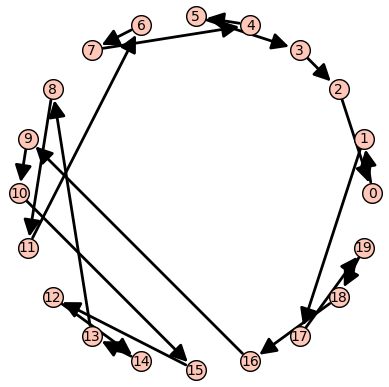

Hamiltonian cycle:


[17, 19, 18, 16, 9, 10, 15, 12, 14, 13, 8, 11, 6, 7, 4, 5, 3, 2, 0, 1]

In [6]:
# generate random tournament
n = 20
T = digraphs.RandomTournament(n)
#T.show()
cycle = HamiltonianCycleOfTournament(T)
cycle